In [0]:
# important libraries
import csv
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

import math


In [0]:

iris = load_iris()
iris_data = iris.data
print(iris.data.shape)


(150, 4)


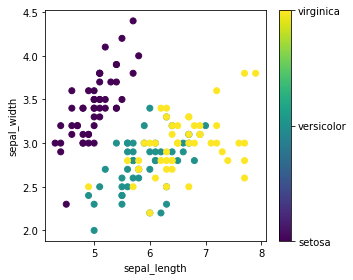

In [0]:

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris_data[:, x_index], iris_data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

plt.tight_layout()
plt.show()

In [0]:
# for iris dataset
data_points = iris_data

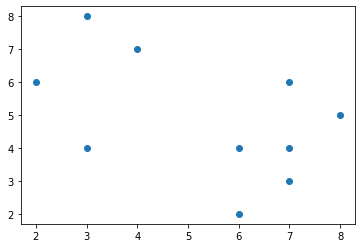

In [0]:
# for user define datapoints
data_points = [[2,10], [2,5], [8,14], [5,8], [7,5], [6,4], [1,2], [4,9] ]
data_points = [[2,6], [3,8], [4,7], [6,2], [6,4], [7,3], [8,5], [7,6], [3,4], [7,4]]
data_points = np.array(data_points)
plt.scatter(data_points[:,0],data_points[:,1])      # visulize the data

**calculate Distance (X1, Y1) and (X2, Y2)**
> L2 Norm
>> $\displaystyle {\sqrt{(X_2 - X_1)^2 + (Y_2 - Y_1)^2}} $

In [0]:

# calculate the distance between two datapoints
def calculateDistance(x, y):
    '''
    INPUT ARGUMENTS:
        x, y : data points
    OUTPUT:
        Distance between two data points
    '''  
    # dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2) 
    x = np.array(x)
    y = np.array(y)
    dist = sum(np.power(np.subtract(x, y), 2))
    return dist

In [0]:
# stoping condition
def check_zero(diff):
    cnt=0
    for i in range (len(diff)):
        for j in range(len(diff[0])):
            if diff[i][j] <= 0.00000005 and diff[i][j] >= -0.00000005:
                cnt += 1
    if cnt == (len(diff) * len(diff[0])):
        return True
    return False

In [0]:
# clone one lists into other
def Cloning(list_1): 
    list_copy = list_1[:] 
    return list_copy

# K-Means Clustering 
1. Choose the number of clusters(K) and obtain the data points 
2. Place the centroids $c_1, c_2, ....., c_k$ randomly 
3. Repeat steps 4 and 5 until convergence or until the end of a fixed number of iterations
4. for each data point $x_i$:
       - find the nearest centroid(c_1, c_2 .. c_k) 
       - assign the point to that cluster 
5. for each cluster j = 1..k
       - new centroid = mean of all points assigned to that cluster with
    $$ C_k = \displaystyle \frac{1}{n} \sum_{n\ \epsilon\ k} X_n $$
6. End 

In [0]:
def k_mean(data_points, K):
    '''
    INPUT ARGUMENTS:
        data_points: Records
        K: Number of cluster
    
    OUTPUT:
        K Centroids of clusters
    '''
    # K = 3 # number of clusters

    centroid_index = [math.floor(np.random.uniform(0, len(data_points))) for i in range(K)] # randmoly select centroid index 

    # centroid_index = [1, 55, 120]
    print("centroid_index: ", centroid_index)       # check the centroid index

    centroid = list()
    for k in range(K):
        centroid.append(data_points[centroid_index[k]]) # Declare the centroid 
    print(centroid)

    # K-mean

    while(1):

        pre_centroid = Cloning(centroid) # store centroid for later to check the difference

        # print('centroid:    ', centroid)
        # print('pre_centroid:', pre_centroid)
        
        cluster_list = [[] for i in range(K)]   # declare the cluster list empty

        centroid_dist = [[] for i in range(K)]  # declare the centroid distance list

        for point in data_points:
            for k in range(K):
                centroid_dist[k] = calculateDistance(point, centroid[k])    # calculate the distance of all the datapoints with the all centroids

            lowest_dist_index = centroid_dist.index(min(centroid_dist))     # Find the data point closer to which centroid
        
            cluster_list[lowest_dist_index].append(point)                   # data point closer to the centroid that datapont go to according cluster

        for k in range(K):
            if len(cluster_list[k]) != 0:
                centroid[k] = np.average(cluster_list[k], axis=0).tolist()  # recalculate the centroid from the cluster 
        
        # print('centroid:    ', centroid)
        # print('pre_centroid:', pre_centroid)

        diff = np.subtract(pre_centroid, centroid)                          # take differnce with previous centroids
        print('diff: ', diff)
        if check_zero(diff):                                                # if the centroid doesn't change break the loop
            break

    print(cluster_list)

    cluster_list = np.array(cluster_list)           # convert list into np.array

    print('\n\nK-Mean')

    c = ['b','r','g','y', 'purple', 'black']        # color array

    for k in range(K):
        cluster_list[k] = np.array(cluster_list[k]) # convert culster datapoints into array

        print(' Cluster', k, 'contain', len(cluster_list[k]), 'points') 

        plt.scatter(cluster_list[k][:,0], cluster_list[k][:,1], c = c[k], label="Cluster-"+str(k))  # plot all the cluster with differnt color
        
    plt.legend()
    plt.show()

    return cluster_list

centroid_index:  [3, 7]
[array([6, 2]), array([7, 6])]
diff:  [[ 0.5        -1.25      ]
 [ 1.83333333  0.        ]]
diff:  [[-0.3        -0.15      ]
 [ 0.36666667 -0.4       ]]
diff:  [[-0.36666667 -0.26666667]
 [ 0.8        -0.35      ]]
diff:  [[-0.66666667 -0.33333333]
 [ 1.          0.5       ]]
diff:  [[0. 0.]
 [0. 0.]]
[[array([6, 2]), array([6, 4]), array([7, 3]), array([8, 5]), array([7, 6]), array([7, 4])], [array([2, 6]), array([3, 8]), array([4, 7]), array([3, 4])]]


K-Mean
 Cluster 0 contain 6 points
 Cluster 1 contain 4 points


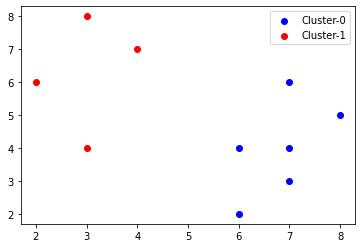

In [0]:
cluster_list = k_mean(data_points, K=2)

[array([[6, 2],
       [6, 4],
       [7, 3],
       [8, 5],
       [7, 6],
       [7, 4]])
 array([[2, 6],
       [3, 8],
       [4, 7],
       [3, 4]])]


# K - Medoid

In [0]:
#data_points = [[2,6], [3,8], [4,7], [6,2], [6,4], [7,3], [8,5], [7,6], [3,4], [7,4]]

**Manhattan distance between data points**
> $|X-Y|$


In [0]:
# manhattan distance between data points

def ManhattanDistance(x, y):
    # dist = |x-y| 
    x = np.array(x)
    y = np.array(y)
    dist = sum(np.sqrt(np.power(np.subtract(x, y), 2)))
    return dist

1. Initialize: select k random points out of the n data points as the medoids.
2. Associate each data point to the closest medoid by using any common distance metric methods.
3. While the cost decreases:
        For each medoid m, for each data o point which is not a medoid:
                1. Swap m and o, associate each data point to the closest medoid, recompute the cost.
                2. If the total cost is more than that in the previous step, undo the swap.

The cost in K-Medoids algorithm is given as –

> $$ c = \sum _{C_i} \sum_{P_i \epsilon C_i} |P_i - C_i|$$

In [0]:
def k_medoid(data_points, K):
    '''
    INPUT ARGUMENTS:
        data_points: Records
        K: Number of cluster
    
    OUTPUT:
        K Centroids of clusters
    '''
    # K = 3 # number of clusters

    medoid_index = [math.floor(np.random.uniform(0, len(data_points))) for i in range(K)]    # randmoly select centroid index 

    # medoid_index = [8, 9]
    print("medoid_index: ", medoid_index)           # check the medoid indexs

    medoid = list()
    for k in range(K):
        medoid.append(data_points[medoid_index[k]]) # declare the medoid randmoly
    print(medoid)

    # K-Medoid


    while(1):
        # if (fis_pre-fis) and (sec_pre-sec) and (thr_pre-thr) and (four_pre-four):
        #     break

        pre_medoid = Cloning(medoid)        # store medoid for later to check the difference

        # print('medoid:    ', medoid)
        # print('pre_medoid:', pre_medoid)
        
        cluster_list = [[] for i in range(K)]   # declare the cluster list empty
        medoid_dist = [[] for i in range(K)]    # declare the medoid distance list

        for point in data_points:
            for k in range(K):
                medoid_dist[k] = ManhattanDistance(point, medoid[k])    # calculate the distance of all the datapoints with the all medoids

            lowest_dist_index = medoid_dist.index(min(medoid_dist))     # Find the data point closer to which medoids
        
            cluster_list[lowest_dist_index].append(point)               # data point closer to the medoids that datapont go to according cluster

        print("cluster_list: ", cluster_list)
        for k in range(K):
            if len(cluster_list[k]) != 0:
                medoid[k] = np.median(cluster_list[k], axis=0).tolist()   # recalculate the medoids from the cluster 
        
        # print('medoid:    ', medoid)
        # print('pre_medoid:', pre_medoid)

        diff = np.subtract(pre_medoid, medoid)                          # take differnce with previous medoids
        print('diff: ', diff)
        if check_zero(diff):                                            # if the medoids doesn't change break the loop
            break
    print(cluster_list)

    cluster_list = np.array(cluster_list)

    #--------------plotting----------------
    print('\n\nK-Medoid')

    c = ['b','r','g','y', 'purple', 'black']

    for k in range(K):
        cluster_list[k] = np.array(cluster_list[k])

        print(' Cluster', k, 'contain', len(cluster_list[k]), 'points')

        plt.scatter(cluster_list[k][:,0], cluster_list[k][:,1], c = c[k], label="Cluster-"+str(k))
        
    plt.legend()
    plt.show()

    return cluster_list

medoid_index:  [137, 29, 93]
[array([6.4, 3.1, 5.5, 1.8]), array([4.7, 3.2, 1.6, 0.2]), array([5. , 2.3, 3.3, 1. ])]
cluster_list:  [[array([7. , 3.2, 4.7, 1.4]), array([6.4, 3.2, 4.5, 1.5]), array([6.9, 3.1, 4.9, 1.5]), array([6.5, 2.8, 4.6, 1.5]), array([5.7, 2.8, 4.5, 1.3]), array([6.3, 3.3, 4.7, 1.6]), array([6.6, 2.9, 4.6, 1.3]), array([5.9, 3. , 4.2, 1.5]), array([6.1, 2.9, 4.7, 1.4]), array([6.7, 3.1, 4.4, 1.4]), array([5.6, 3. , 4.5, 1.5]), array([6.2, 2.2, 4.5, 1.5]), array([5.9, 3.2, 4.8, 1.8]), array([6.3, 2.5, 4.9, 1.5]), array([6.1, 2.8, 4.7, 1.2]), array([6.4, 2.9, 4.3, 1.3]), array([6.6, 3. , 4.4, 1.4]), array([6.8, 2.8, 4.8, 1.4]), array([6.7, 3. , 5. , 1.7]), array([6. , 2.9, 4.5, 1.5]), array([6. , 2.7, 5.1, 1.6]), array([5.4, 3. , 4.5, 1.5]), array([6. , 3.4, 4.5, 1.6]), array([6.7, 3.1, 4.7, 1.5]), array([6.3, 2.3, 4.4, 1.3]), array([6.1, 3. , 4.6, 1.4]), array([6.2, 2.9, 4.3, 1.3]), array([6.3, 3.3, 6. , 2.5]), array([5.8, 2.7, 5.1, 1.9]), array([7.1, 3. , 5.9, 2.1

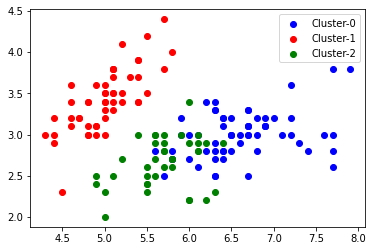

In [0]:
cluster_list = k_medoid(data_points, K=3)
